In [3]:
import pandas as pd
import os

### Merging 12 months of sales data in a single CSV file

In [55]:
directory = r"C:\Users\pc\Downloads\Sales_Data"

files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# create an empty data frame
all_months_data = pd.DataFrame()

# looping through each file and concatenate the data
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

# saving the concatenated dataframe to a new csv file in the same directory
output_file_path = os.path.join(directory, "all_data.csv")
all_months_data.to_csv(output_file_path, index=False)

print(f"All data combined and saved to {output_file_path}")


All data combined and saved to C:\Users\pc\Downloads\Sales_Data\all_data.csv


### Read the updated file

In [57]:
all_data = pd.read_csv(r"C:\Users\pc\Downloads\Sales_Data\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean the data

In [59]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [61]:
temp_df =  all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [66]:
# Delete or
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Augment data with additional columns

### Task 1. Add month column

In [68]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add sales column

In [78]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Convert columns

In [72]:
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


In [74]:
# quantity ordered to integer
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# price each to float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [76]:
print(all_data.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object


### Best month for sales & how much was made that day 

In [84]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

monthly_sales = all_data.groupby('Month')['Total Sales'].sum()

best_month = monthly_sales.idxmax()

best_month_sales = monthly_sales[best_month]

print(f"The best month for sales was: {best_month}")
print(f"The total sales for that month were: ${best_month_sales:.2f}")

# all monthly sales
print("\nMonthly sales:")
print(monthly_sales)

The best month for sales was: 12
The total sales for that month were: $4613443.34

Monthly sales:
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64


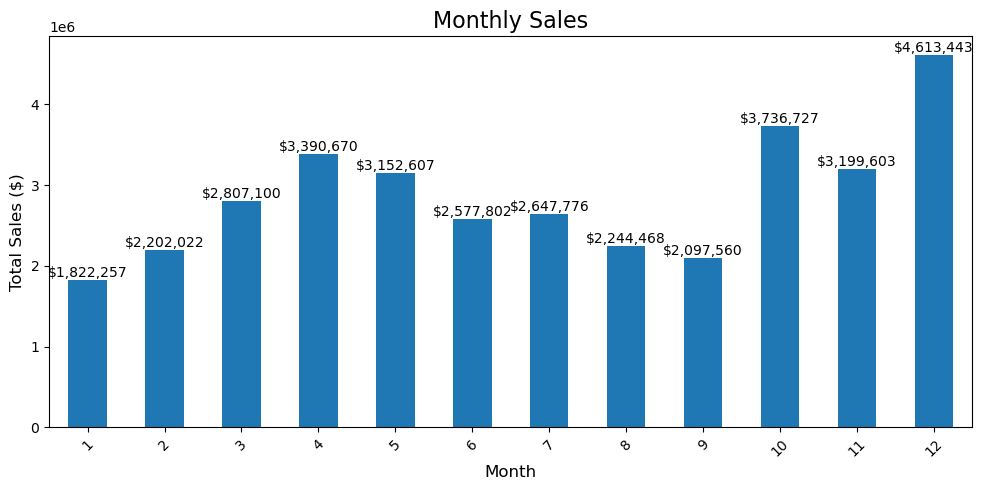

In [86]:
import matplotlib.pyplot as plt

monthly_sales = all_data.groupby('Month')['Total Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar')

plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(monthly_sales):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### What city sold the most Product

In [88]:
# city from Purchase Address
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()

city_sales = all_data.groupby('City')['Quantity Ordered'].sum().reset_index()

city_sales_sorted = city_sales.sort_values('Quantity Ordered', ascending=False)

top_city = city_sales_sorted.iloc[0]

print(f"The city that sold the most product is {top_city['City']} with {top_city['Quantity Ordered']} units sold.")
print(city_sales_sorted)

The city that sold the most product is San Francisco with 50239 units sold.
            City  Quantity Ordered
7  San Francisco             50239
4    Los Angeles             33289
5  New York City             27932
2         Boston             22528
3         Dallas             16730
0        Atlanta             16602
8        Seattle             16553
6       Portland             14053
1         Austin             11153


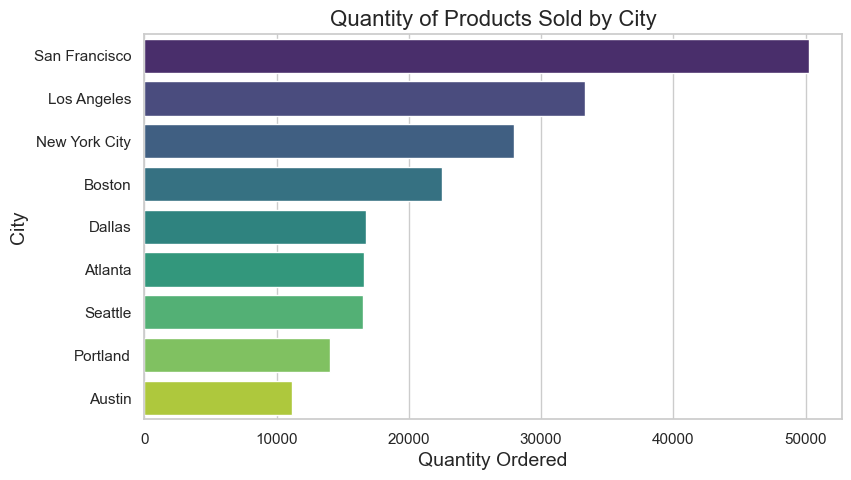

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(9, 5))
sns.barplot(x='Quantity Ordered', y='City', data=city_sales_sorted, palette='viridis')

plt.title('Quantity of Products Sold by City', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=14)
plt.ylabel('City', fontsize=14)

plt.show()


###  What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [113]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
#hourly_sales = all_data.groupby('Hour')['Quantity Ordered'].sum()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


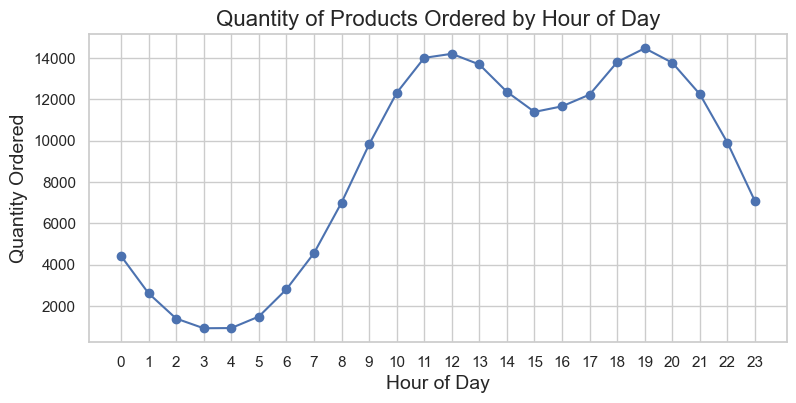

In [127]:
hourly_sales = all_data.groupby('Hour')['Quantity Ordered'].sum()

sns.set(style="whitegrid")

plt.figure(figsize=(9, 4))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='b')

plt.title('Quantity of Products Ordered by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Quantity Ordered', fontsize=14)
plt.xticks(range(0, 24))  # ensures every hour is shown on the x-axis
plt.grid(True)

plt.show()

# my recommendation is between 11am (11) or 7pm (19)

###  What products are most often sold together?

In [137]:
from itertools import combinations
from collections import Counter

# filter rows where the order id is the same indicating multiple products in a single order
df_grouped = all_data[all_data['Order ID'].duplicated(keep=False)]

# group by order id and aggregate the products into a single column
# creating a copy, you avoid the ambiguity that leads to the settingWithcopywarning
df_grouped = df_grouped.copy()
df_grouped['Grouped Products'] = df_grouped.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


# dropping duplicates to only keep one entry per drop
df_grouped = df_grouped[['Order ID', 'Grouped Products']].drop_duplicates()

#creating a counter to count the frequency of each product combination
count = Counter()

# iterate through each row of grouped products
for products in df_grouped['Grouped Products']:
    product_list = products.split(',')
    count.update(Counter(combinations(product_list, 2)))  # Find all combinations of 2 products

# display the most common combinations
for product_combination, frequency in count.most_common(10):
    print(f"{product_combination}: {frequency}")


('iPhone', 'Lightning Charging Cable'): 1005
('Google Phone', 'USB-C Charging Cable'): 987
('iPhone', 'Wired Headphones'): 447
('Google Phone', 'Wired Headphones'): 414
('Vareebadd Phone', 'USB-C Charging Cable'): 361
('iPhone', 'Apple Airpods Headphones'): 360
('Google Phone', 'Bose SoundSport Headphones'): 220
('USB-C Charging Cable', 'Wired Headphones'): 160
('Vareebadd Phone', 'Wired Headphones'): 143
('Lightning Charging Cable', 'Wired Headphones'): 92


### What product sold the most? Why do you think it sold the most?

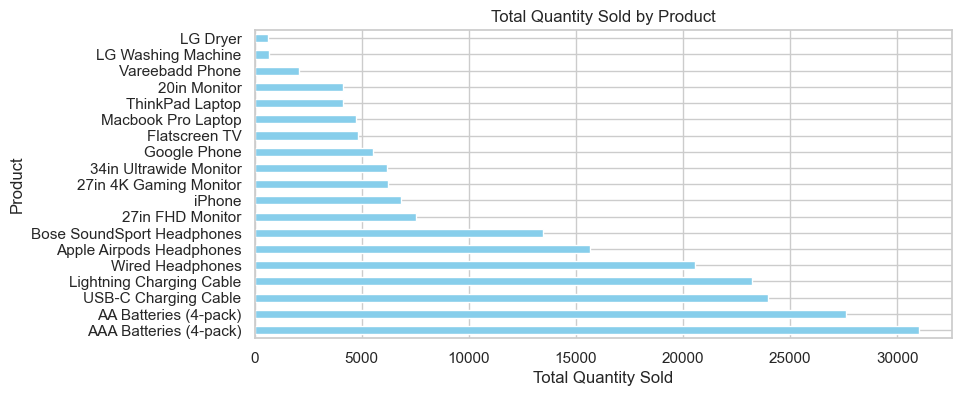

In [166]:
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(9, 4))
product_sales.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Total Quantity Sold by Product')
plt.gca().invert_yaxis()  # To display the highest quantity at the top
plt.show()
